In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')
import json

In [1]:
imdb_title_ratings = pd.read_csv('./zippedData/imdb.title.ratings.csv.gz') # merged with titlebasics
imdb_title_basics = pd.read_csv('./zippedData/imdb.title.basics.csv.gz') # merged with titleratings
# imdb_title_akas = pd.read_csv('./zippedData/imdb.title.akas.csv.gz')   -- not using

bom_movie_gross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')

imdb_title_crew = pd.read_csv('./zippedData/imdb.title.crew.csv.gz')
imdb_name_basics = pd.read_csv('./zippedData/imdb.name.basics.csv.gz')
imdb_title_principals = pd.read_csv('./zippedData/imdb.title.principals.csv.gz')

rt_movie_info = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', sep = '\t')
rt_reviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz', sep = '\t', encoding = 'latin1')
tmdb_movies = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
tn_movie_budgets = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

In [2]:
pd.set_option('display.max_rows', 30)

<h1> IMDB Merging, Cleaning, Inspection </h1>

In [3]:
imdb_title = imdb_title_ratings.merge(right = imdb_title_basics, how = 'outer', on = 'tconst') 
imdb_title.head(5)
# Merging title ratings and title basics

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31.0,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559.0,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20.0,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352.0,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21.0,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [258]:
# imdb_title = imdb_title.merge(right = imdb_title_akas, how = 'outer', left_on = 'tconst', right_on = 'title_id')
# Merging merged(title & basics) with title akas which only contained regions

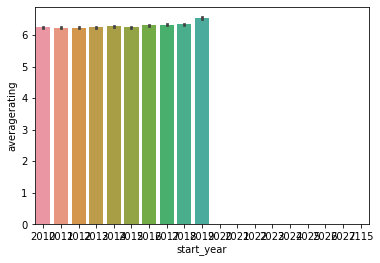

In [73]:
# sns.scatterplot(imdb_title['runtime_minutes'], imdb_title['averagerating'])
sns.barplot(imdb_title['start_year'], imdb_title['averagerating'])

In [4]:
imdb_title_outliers_dropped = imdb_title.drop(imdb_title[imdb_title['runtime_minutes']>600].index) 
# removing outliers from 'runtime_minutes'

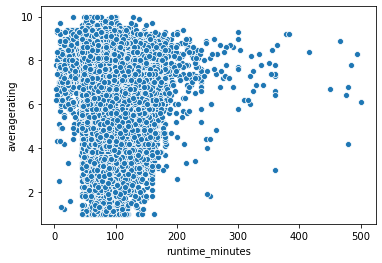

In [102]:
sns.scatterplot(imdb_title_outliers_dropped['runtime_minutes'], imdb_title_outliers_dropped['averagerating'])

In [51]:
imdb_title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [75]:
imdb_name_basics.head()
# directors, producers, actors/actresses, composers

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [76]:
# actors_df = imdb_name_basics['actor' in imdb_name_basics['primary_profession']]
# actors_df.head()

In [82]:
imdb_title_principals.head(1)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"


In [57]:
# imdb_title_akas.drop(['types', 'attributes', 'language', 'is_original_title', 'ordering', 'title'], axis = 1, inplace = True)

In [5]:
# imdb_title = imdb_title.merge(right = imdb_title_akas, how = 'outer', left_on = 'tconst', right_on = 'title_id')

<h1> TN Movie Budgets Cleaning and Inspection </h1>

In [134]:
tn_movie_budgets.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279


In [34]:

# tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].map(lambda x: x.replace(',', ''))
# tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].map(lambda x: x.replace('$', ''))

for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    tn_movie_budgets[col] = tn_movie_budgets[col].str.replace(r'\D', '')
    tn_movie_budgets[col] = tn_movie_budgets[col].astype('int')

In [38]:
tn_movie_budgets[['production_budget', 'domestic_gross', 'worldwide_gross']].isna().sum()

production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

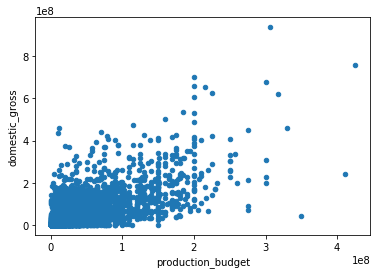

In [37]:
# sns.scatterplot(tn_movie_budgets['production_budget'], tn_movie_budgets['domestic_gross'])
tn_movie_budgets.plot(x = 'production_budget', y = 'domestic_gross', kind = 'scatter')



<h1> Rotten Tomatoes Cleaning and Inspection </h1>

In [51]:
rt_movie_info.head(5)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",,600000,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",,41032915,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",,224114,123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",,134904,117 minutes,NaN
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",,1039869,108 minutes,ATO Pictures


In [27]:
rt_movie_info.dropna(subset = ['box_office'], inplace = True)

In [30]:
# If no new cols added(i.e. in a merge), replace loop with two lines, one lambda for replacing and second line as is

for col in ['box_office']:
    rt_movie_info[col] = rt_movie_info[col].str.replace(r'\D', '')
    rt_movie_info[col] = rt_movie_info[col].astype('int64')


## Gathering top 50% 
<p> My goal is to select directors whose movies yield above-average returns at the box office, on average. First I find the mean box office. Then I group by directors and their mean box office, and I use sum() to get the total number of directors with above-average returns. This number is 84. I go on again to group the dataset by director and mean box office, though this time sorting values in ascending order, taking the top 84, and assigning the series to a variable top_84_directors. Finally, I employ a barplot to display the mean box office by director. </p>

In [63]:
rt_mean_box_office = rt_movie_info['box_office'].mean() 
# Mean box office for RT dataset is $37,906,010

In [64]:
rt_gb_director = rt_movie_info.groupby(['director'])['box_office'].mean().sort_values()
(rt_gb_director > rt_mean_box_office).sum()

84

In [65]:
top_84_directors = rt_movie_info.groupby(['director'])['box_office'].mean().sort_values(ascending = False).head(84)

In [66]:
top_84_directors

director
Mel Gibson                       368000000.0
Peter Jackson                    303001229.0
Chris Columbus                   261835892.0
Joel Zwick                       241250669.0
Peter Berg                       227946274.0
                                    ...     
Tim McCanlies                     41407470.0
Jake Kasdan                       41032915.0
Jonathan Liebesman                39418953.0
Jason Friedberg|Aaron Seltzer     38200000.0
Ron Clements|John Musker          38120554.0
Name: box_office, Length: 84, dtype: float64

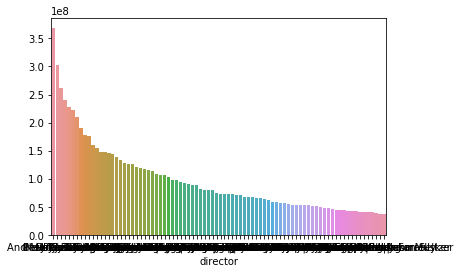

In [67]:
sns.barplot(top_84_directors.index, top_84_directors.values)

<h1> Next </h1>

In [95]:
tmdb_movies.head(1)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


<h1> Kaggle </h1>

In [262]:
kaggle_plot_keywords = pd.read_csv('./kaggleData/keywords.csv.zip')

In [263]:
kaggle_movies = pd.read_csv('./kaggleData/movie_production.csv', encoding = 'latin1')

<h3> Plot Keywords Exploration </h3>

In [264]:
import re

In [265]:
# kaggle_plot_keywords.drop([119, 120], inplace = True)

In [266]:


kaggle_plot_keywords['keywords'] = kaggle_plot_keywords['keywords'].map(lambda x: '' if len(x) < 4 else x)
kaggle_plot_keywords = kaggle_plot_keywords.drop(kaggle_plot_keywords[kaggle_plot_keywords['keywords'] == ''].index)
                                         


In [287]:
kaggle_plot_keywords


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46409,84419,"[{'id': 9748, 'name': 'revenge'}, {'id': 9826,..."
46410,390959,"[{'id': 224180, 'name': 'blair witch'}]"
46411,289923,"[{'id': 616, 'name': 'witch'}, {'id': 2035, 'n..."
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"


In [288]:
entry1 = kaggle_plot_keywords.loc[0, 'keywords']
p = re.compile('(?<!\\\\)\'')
entry1 = p.sub('\"', entry1)
entry1 = json.loads(entry1)
entry1

[{'id': 931, 'name': 'jealousy'},
 {'id': 4290, 'name': 'toy'},
 {'id': 5202, 'name': 'boy'},
 {'id': 6054, 'name': 'friendship'},
 {'id': 9713, 'name': 'friends'},
 {'id': 9823, 'name': 'rivalry'},
 {'id': 165503, 'name': 'boy next door'},
 {'id': 170722, 'name': 'new toy'},
 {'id': 187065, 'name': 'toy comes to life'}]

In [289]:
def kaggle_plot_keywords_json_to_list(dataframe, keywords_column): 

    keywords_list = []
    
    p = re.compile('(?<!\\\\)\'')
    
    for i in range(len(dataframe[keywords_column].head(1))):
        entry = dataframe.loc[i, keywords_column]
        entry = p.sub('\"', entry)
        entry = json.loads(entry)
        
        for dict_item in entry:
            keywords_list.append(dict_item['name'])
        
        dataframe.loc[i, keywords_column] = keywords_list
        
    return 
    

In [290]:
kaggle_plot_keywords_json_to_list(kaggle_plot_keywords, 'keywords')
# returns json error

['jealousy',
 'toy',
 'boy',
 'friendship',
 'friends',
 'rivalry',
 'boy next door',
 'new toy',
 'toy comes to life']

<h3> Movie Prod and Directors </h3>

In [125]:
kaggle_movies.head(5) 
# this dataset is fire

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit,gross_margin
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,44287414.0,0.847000
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,64136369.0,0.914452
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,164800601.0,0.916574
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,66660248.0,0.782762
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,9564613.0,0.515207


In [267]:
kaggle_movies['profit'] = kaggle_movies['gross'] - kaggle_movies['budget']
# kaggle_movie_prod['gross_margin'] = kaggle_movie_prod['profit']/kaggle_movie_prod['gross']

In [268]:
kaggle_movies.groupby(['company'])['profit'].mean().sort_values(ascending = False).quantile(.9)

17588246.800000004

In [269]:
kag_company_vs_prof = kaggle_movies.groupby(['company'])['profit'].mean().sort_values(ascending = False).head(20)

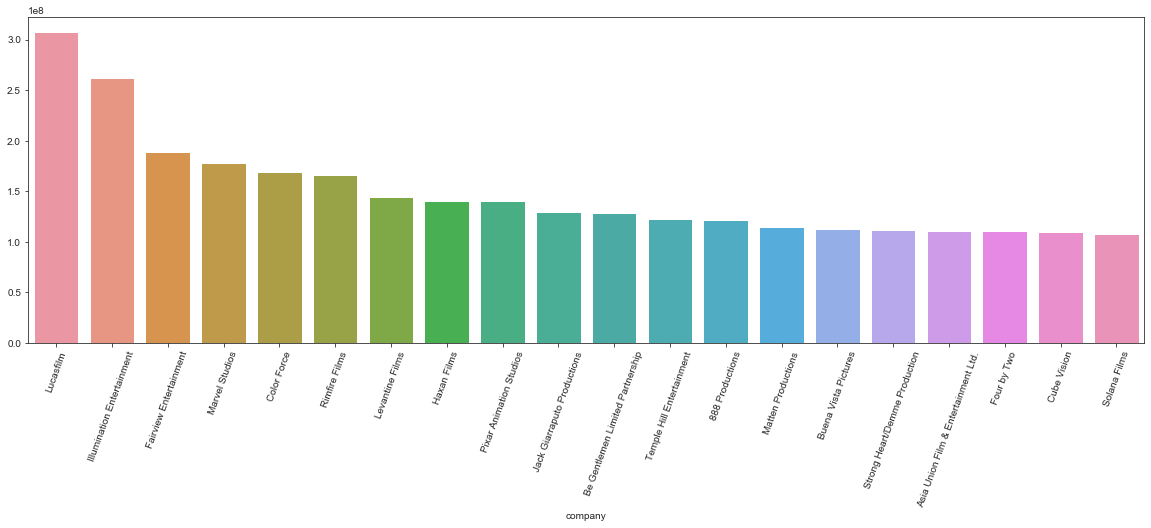

In [297]:
plt.figure(figsize = (20,6))
c1 = sns.barplot(x = kag_company_vs_prof.index, y = kag_company_vs_prof.values)
c1.set_xticklabels(c1.get_xticklabels(), rotation = 70);
# fig.patch.set_facecolor('white')
# fig.patch.set_alpha(0.7)

In [270]:
# Cleaning Ratings Column

kaggle_movies['rating'] = kaggle_movies['rating'].map(lambda x: 'NOT RATED' if x == 'Not specified' else x)
kaggle_movies['rating'] = kaggle_movies['rating'].map(lambda x: 'R' if x == 'NC-17' else x)

for rating in ['B15', 'TV-MA', 'TV-PG', 'TV-14', 'B']:
    kaggle_movies.drop(kaggle_movies[kaggle_movies['rating'] == rating].index, inplace = True)




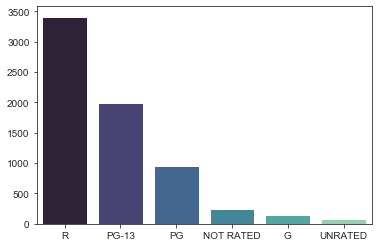

In [298]:

rating_count_barplot = sns.barplot(kaggle_movies['rating'].value_counts().index, 
                                   kaggle_movies['rating'].value_counts().values, 
                                   palette = 'mako')
# How to add to subplot?

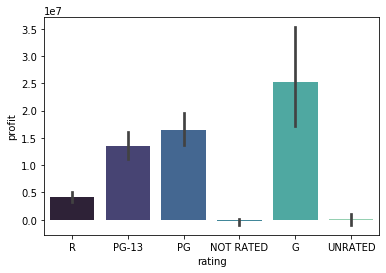

In [178]:
rating_vs_mean_profit_barplot = sns.barplot(kaggle_movies['rating'], 
                                            kaggle_movies['profit'],  
                                            palette = 'mako', 
                                            order = ['R', 'PG-13', 'PG', 'NOT RATED','G','UNRATED'])

# How to add to subplot?

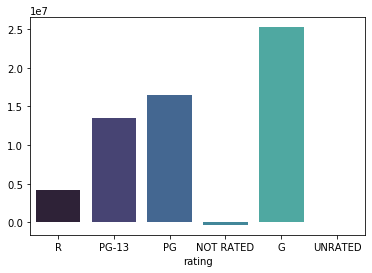

In [156]:
#y minimum for NOT RATED
sns.barplot(kaggle_movies.groupby(['rating'])['profit'].mean().index, 
            kaggle_movies.groupby(['rating'])['profit'].mean().values, 
            palette = 'mako', 
            order = ['R', 'PG-13', 'PG', 'NOT RATED','G','UNRATED'])

In [193]:
def genre_vs_profit_barplot(dataframe, genre, profit):
    plt.title('Movie Genre vs Profit')
    chart = sns.barplot(genre, 
                        profit, 
                        data = dataframe)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 50)
    chart.set(xlabel='Movie Genre', ylabel='Profit ($10M)');
    return plt.show()

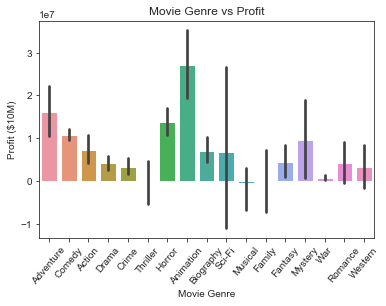

In [208]:
genre_vs_profit_barplot(kaggle_movies, 'genre', 'profit')

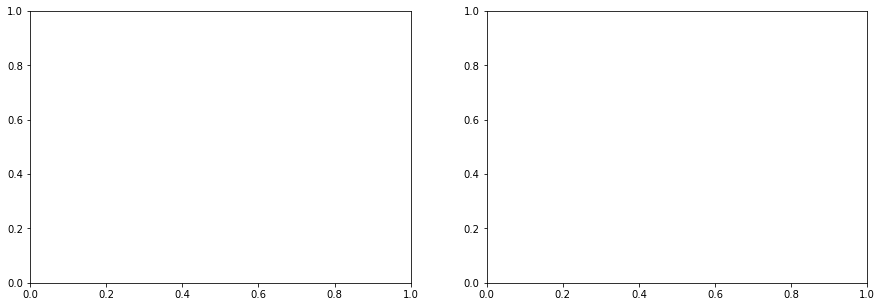

In [169]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
ax1 = axes[0]
ax2 = axes[1]

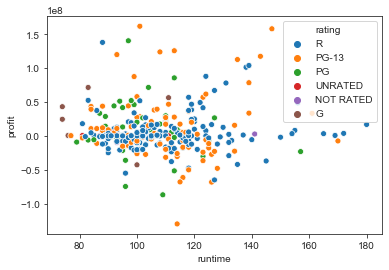

In [286]:
three_var_scatter = sns.scatterplot(kaggle_movies['runtime'].sample(n = 1500), 
                                    kaggle_movies['profit'].sample(n = 1500), 
                                    hue = kaggle_movies['rating'])

In [315]:
def create_kaggle_ratings_dfs_for_subplots(dataframe):
    """
    
    Takes kaggle_movies and returns six dfs, one for each rating.
    
    """
    ratings_list = ['R', 'PG-13', 'PG', 'NOT RATED','G','UNRATED']
    dfs_list = []
    
    for rating in range(len(ratings_list)):
        df = dataframe[dataframe['rating'] == ratings_list[rating]]
        dfs_list.append(df)
    
    return dfs_list
 
    
    
    
def create_ratings_subplots_from_dfs_list(dfs_list):
    """
    
    Takes list of dataframes, one for each rating, and creates a subplot for each.
    
    """
    axes_tuple = (ax1, ax2, ax3, ax4, ax5, ax6)
    fig, axes_tuple = plt.subplots(ncols=2, nrows = 3,figsize = (15, 8)) # sharey = True  
    
    for axes in axes_tuple:
        
    
    
    
    
    
# sns.regplot(x=idx, y=df['x'], ax=ax1)
# sns.regplot(x=idx, y=df['y'], ax=ax2)

In [319]:
create_kaggle_ratings_dfs_for_subplots(kaggle_movies)[0].head(1)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,44287414.0


In [318]:
ratings_list = ['R', 'PG-13', 'PG', 'NOT RATED','G','UNRATED']

kaggle_movies[kaggle_movies['rating'] == ratings_list[0]].head(1)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,44287414.0
